## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the CSV File

In [6]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

## Check the Top 5 rows

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Shape

In [8]:
df.shape

(891, 12)

## Check NullValues

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Drop the null values

In [11]:
df.drop(['Cabin'],axis=1,inplace=True)

#### impution

In [12]:
# missing  value fill with mean 
mean=df['Age'].mean()
df['Age']=df['Age'].fillna(mean)
df['Embarked']=df['Embarked'].fillna(mean)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Check Duplicate values

In [14]:
df.duplicated().sum()

0

### Split to Numerical and Categorical

In [15]:
numerical=df.select_dtypes(include=['int64','float64'])
categorical=df.select_dtypes(include=['object'])

#### First do the Numerical

In [16]:
numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


#### Data Visualiztion


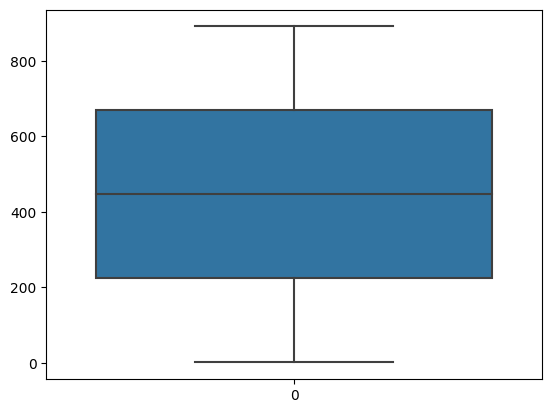

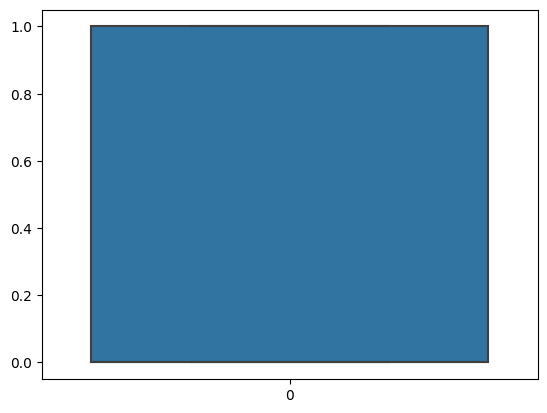

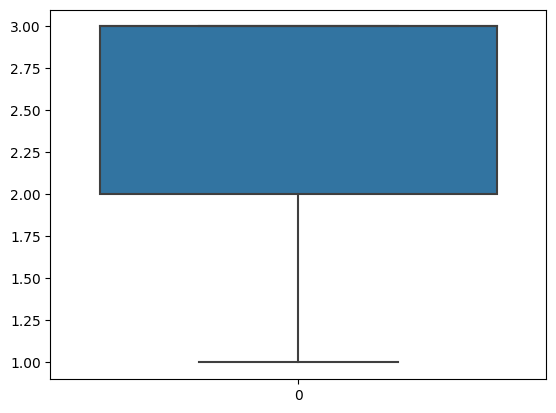

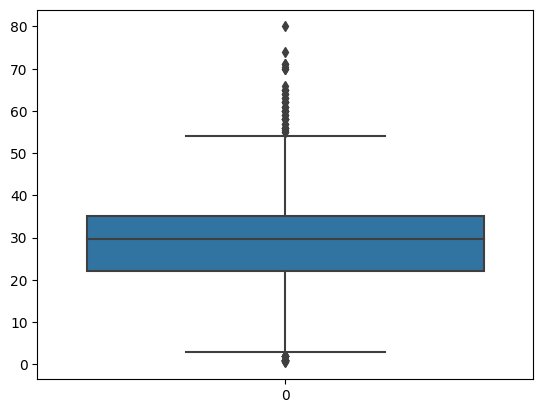

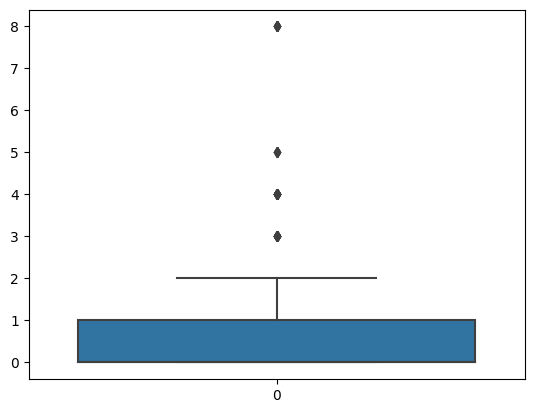

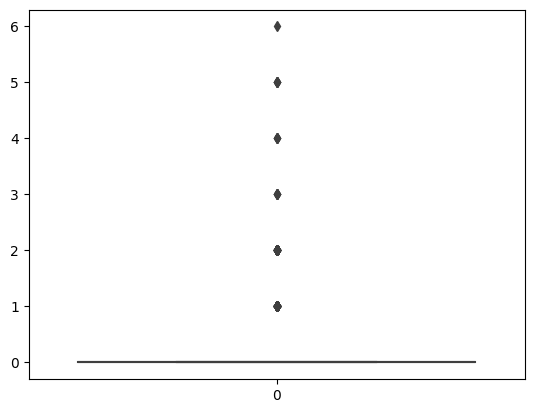

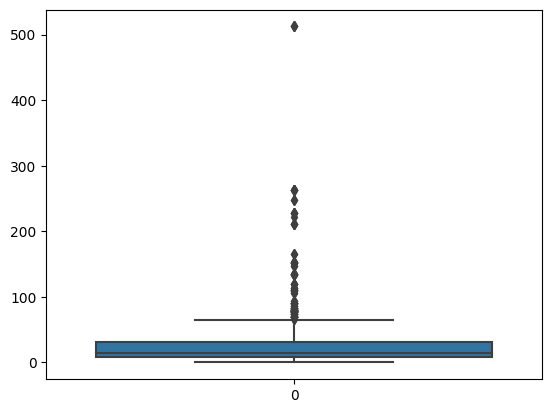

In [17]:
#boxplot with numercal check the outliers
for col in numerical:
    sns.boxplot(numerical[col])
    plt.show()

### Interquaetile range


In [18]:
# handiling the outliers with wisker 
def wisker(col):
  q1=numerical[col].quantile(0.25)
  q3=numerical[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [19]:
for i in df.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i)
  numerical[i]=np.where(numerical[i]<lower,lower,numerical[i])
  numerical[i]=np.where(numerical[i]>upper,upper,numerical[i])

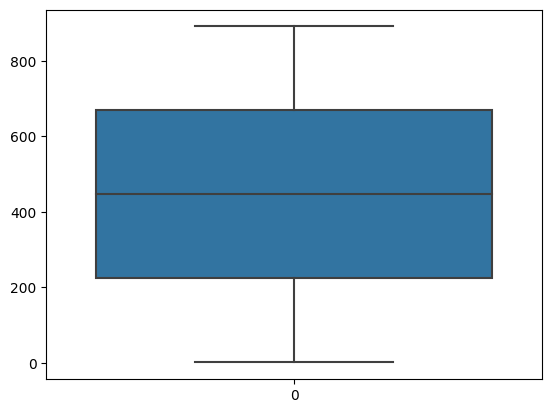

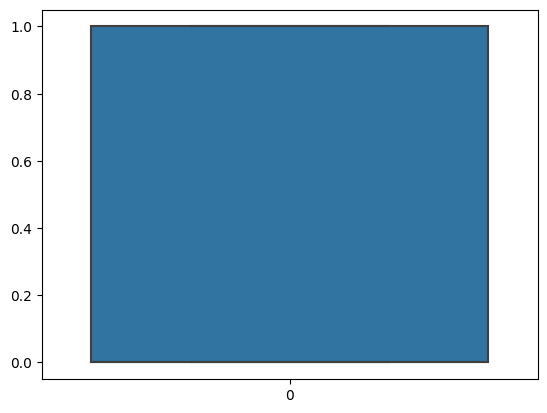

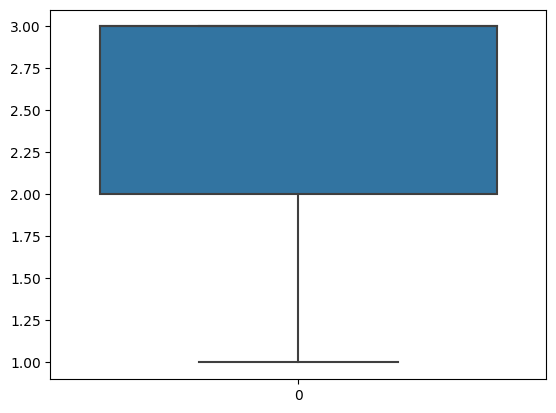

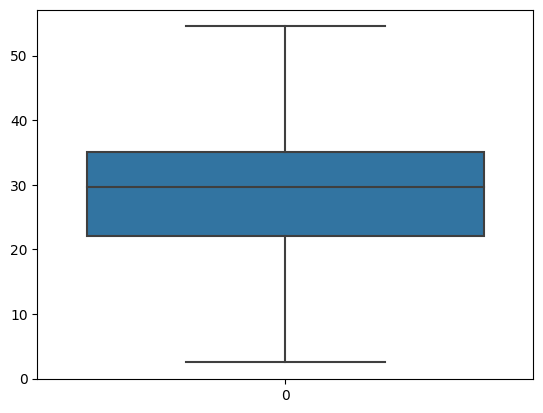

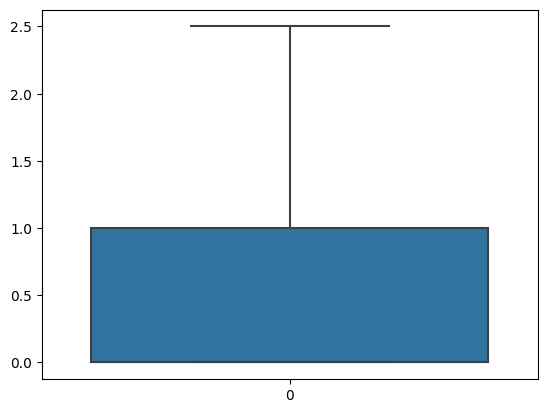

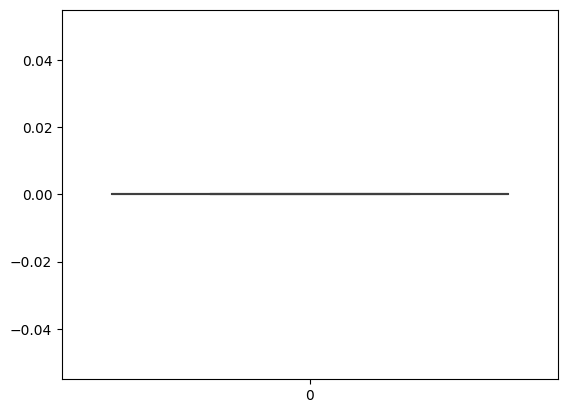

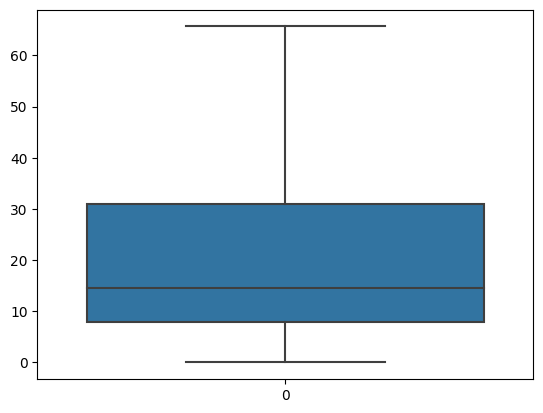

In [20]:
#boxplot with numercal check the outliers
for col in numerical:
    sns.boxplot(numerical[col])
    plt.show()

## Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_scaled= scaler.fit_transform(numerical)

In [22]:
# makethe datafarme
num_scaled=pd.DataFrame(num_scaled,columns=numerical.columns)

In [23]:
num_scaled.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,0.375000,0.4,0.0,0.110460
1,0.001124,1.0,0.0,0.682692,0.4,0.0,1.000000
2,0.002247,1.0,1.0,0.451923,0.0,0.0,0.120745
3,0.003371,1.0,0.0,0.625000,0.4,0.0,0.809027
4,0.004494,0.0,1.0,0.625000,0.0,0.0,0.122649


### Do the categorical

In [24]:
categorical

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [25]:
categorical.isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [26]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Embarked  891 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [27]:
categorical= categorical.astype(str)

### Ecoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
encoded_categorical = categorical.apply(label_encoder.fit_transform)

# Display the encoded categorical data
encoded_categorical.head()


,Name,Sex,Ticket,Embarked
0,108,1,523,3
1,190,0,596,1
2,353,0,669,3
3,272,0,49,3
4,15,1,472,3


### Majoring the categorical and Numerical

In [29]:
df1=pd.concat([num_scaled,encoded_categorical],axis=1)

In [30]:
x=df1.drop('Survived',axis=1)
y=df1['Survived']

#### Train and Split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Model builde

## LogisticRegression

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print("lr Score on Training data",lr.score(x_train,y_train))
print("lr Score on Training data",lr.score(x_test,y_test))


lr Score on Training data 0.8033707865168539
lr Score on Training data 0.8100558659217877


#### Predict

In [35]:
y_pred=lr.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1.])

#### Accuracy

In [38]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8100558659217877

#### Confusion Matrix

In [39]:
print(confusion_matrix(y_test, y_pred))

[[88 17]
 [17 57]]


#### Precision ,Recall,F1-Score

In [40]:
CM=classification_report(y_pred ,y_test)
CM

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.84      0.84       105\n         1.0       0.77      0.77      0.77        74\n\n    accuracy                           0.81       179\n   macro avg       0.80      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## SVC (Support Vector Classifier)

In [42]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [43]:
print("lr Score on Training data",lr.score(x_train,y_train))
print("lr Score on Training data",lr.score(x_test,y_test))

lr Score on Training data 0.8033707865168539
lr Score on Training data 0.8100558659217877


#### Predict

In [44]:
y_pred=lr.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1.])

#### Accuracy

In [45]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8100558659217877

#### Classification Matrix

In [46]:
CM=classification_report(y_pred ,y_test)
CM

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.84      0.84       105\n         1.0       0.77      0.77      0.77        74\n\n    accuracy                           0.81       179\n   macro avg       0.80      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

## DecisionTree

In [47]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
print("lr Score on Training data",lr.score(x_train,y_train))
print("lr Score on Training data",lr.score(x_test,y_test))

lr Score on Training data 0.8033707865168539
lr Score on Training data 0.8100558659217877


#### Predict

In [49]:
y_pred=lr.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1.])

#### Accuracy

In [50]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8100558659217877

#### Classification_Matrix

In [51]:
CM=classification_report(y_pred ,y_test)
CM

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.84      0.84       105\n         1.0       0.77      0.77      0.77        74\n\n    accuracy                           0.81       179\n   macro avg       0.80      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

## KNN

In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
print("lr Score on Training data",lr.score(x_train,y_train))
print("lr Score on Training data",lr.score(x_test,y_test))

lr Score on Training data 0.8033707865168539
lr Score on Training data 0.8100558659217877


#### Predict

In [54]:
y_pred=lr.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1.])

#### Accuracy

In [55]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8100558659217877

#### Precision,Recall,F1-score

In [56]:
CM=classification_report(y_pred ,y_test)
CM

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.84      0.84       105\n         1.0       0.77      0.77      0.77        74\n\n    accuracy                           0.81       179\n   macro avg       0.80      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'